# IT21271182 - Rathnayake R M U V

# Tempereture Prediction in Sri Lanka using **Random Forest Regressor**

### Data Preprocessing


##### Import libraries

In [58]:
#Importing Libraries needed
import pandas as pd

#### Load the Dataset

In [59]:
# Load the weather data
weather_data = pd.read_csv('/content/weatherData.csv')

# Display the first few rows of weather data
print("Weather Data:")
weather_data.head()


Weather Data:


,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07


In [60]:
# Load the location data
location_data = pd.read_csv('/content/locationData.csv')

# Display the first few rows of location data
print("Location Data:")
location_data.head()

Location Data:


,location_id,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name
0,0,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
1,1,7.065026,79.96622,19,19800,Asia/Colombo,530,Gampaha
2,2,6.572935,80.02519,5,19800,Asia/Colombo,530,Kalutara
3,3,7.275923,80.62659,499,19800,Asia/Colombo,530,Kandy
4,4,7.486819,80.52632,362,19800,Asia/Colombo,530,Matale


#### Merge data frames

In [61]:
# Merge the dataframes on 'location_id'
merged_data = pd.merge(weather_data, location_data, on='location_id')

# Display the first few rows of the merged dataframe
print("\nMerged Data:")
merged_data.head()


Merged Data:


,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,et0_fao_evapotranspiration (mm),sunrise,sunset,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,4.61,06:22,18:05,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,3.91,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,3.66,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,3.75,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,5.00,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo


#### Remove Unnecessary Columns

In [62]:
# Define the columns to drop
columns_to_drop = [
    'date',
    'sunrise',
    'sunset',
    'timezone',
    'timezone_abbreviation'
]

# Remove unnecessary columns
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the first few rows of the modified merged data
print("\nMerged Data after dropping unnecessary columns:")
merged_data.head()



Merged Data after dropping unnecessary columns:


,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),...,wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),latitude,longitude,elevation,utc_offset_seconds,city_name
0,0,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,38905.73,...,12.2,27.4,19,20.92,4.61,6.924429,79.90725,4,19800,Colombo
1,0,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,37451.01,...,13.0,27.0,24,17.71,3.91,6.924429,79.90725,4,19800,Colombo
2,0,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,33176.43,...,12.3,27.4,17,17.76,3.66,6.924429,79.90725,4,19800,Colombo
3,0,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,38289.20,...,17.0,34.6,357,16.50,3.75,6.924429,79.90725,4,19800,Colombo
4,0,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,39113.82,...,18.7,37.1,353,23.61,5.00,6.924429,79.90725,4,19800,Colombo


#### Handle Missing Values

In [63]:
# Check for missing values in the merged_data
print("Missing values in each column before handling:")
print(merged_data.isnull().sum())

Missing values in each column before handling:
location_id                        0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
latitude                           0
longitude                          0
elevation                          0
utc_offset_seconds                 0
city_name                          0
dtype: int64


#### Encode categorical features

Used One-Hot Encoding on city name column

In [64]:
# Perform one-hot encoding on the 'city_name' column
merged_data = pd.get_dummies(merged_data, columns=['city_name'], drop_first=True)

# Display the first few rows of the updated merged_data to check the result
merged_data.head()


,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),...,city_name_Matara,city_name_Moneragala,city_name_Mullaitivu,city_name_Nuwara Eliya,city_name_Polonnaruwa,city_name_Puttalam,city_name_Ratnapura,city_name_Trincomalee,city_name_Vavuniya,city_name_Welimada
0,0,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,38905.73,...,False,False,False,False,False,False,False,False,False,False
1,0,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,37451.01,...,False,False,False,False,False,False,False,False,False,False
2,0,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,33176.43,...,False,False,False,False,False,False,False,False,False,False
3,0,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,38289.20,...,False,False,False,False,False,False,False,False,False,False
4,0,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,39113.82,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# Verify the data types of all columns in the merged_data DataFrame
print(merged_data.dtypes)

location_id                          int64
weather_code (wmo code)              int64
temperature_2m_max (°C)            float64
temperature_2m_min (°C)            float64
temperature_2m_mean (°C)           float64
apparent_temperature_max (°C)      float64
apparent_temperature_min (°C)      float64
apparent_temperature_mean (°C)     float64
daylight_duration (s)              float64
sunshine_duration (s)              float64
precipitation_sum (mm)             float64
rain_sum (mm)                      float64
precipitation_hours (h)              int64
wind_speed_10m_max (km/h)          float64
wind_gusts_10m_max (km/h)          float64
wind_direction_10m_dominant (°)      int64
shortwave_radiation_sum (MJ/m²)    float64
et0_fao_evapotranspiration (mm)    float64
latitude                           float64
longitude                          float64
elevation                            int64
utc_offset_seconds                   int64
city_name_Anuradhapura                bool
city_name_B

In [66]:
# Display the first few rows of the updated merged_data to check the result
merged_data.head()

,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),...,city_name_Matara,city_name_Moneragala,city_name_Mullaitivu,city_name_Nuwara Eliya,city_name_Polonnaruwa,city_name_Puttalam,city_name_Ratnapura,city_name_Trincomalee,city_name_Vavuniya,city_name_Welimada
0,0,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,38905.73,...,False,False,False,False,False,False,False,False,False,False
1,0,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,37451.01,...,False,False,False,False,False,False,False,False,False,False
2,0,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,33176.43,...,False,False,False,False,False,False,False,False,False,False
3,0,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,38289.20,...,False,False,False,False,False,False,False,False,False,False
4,0,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,39113.82,...,False,False,False,False,False,False,False,False,False,False


In [67]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 48 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location_id                      142371 non-null  int64  
 1   weather_code (wmo code)          142371 non-null  int64  
 2   temperature_2m_max (°C)          142371 non-null  float64
 3   temperature_2m_min (°C)          142371 non-null  float64
 4   temperature_2m_mean (°C)         142371 non-null  float64
 5   apparent_temperature_max (°C)    142371 non-null  float64
 6   apparent_temperature_min (°C)    142371 non-null  float64
 7   apparent_temperature_mean (°C)   142371 non-null  float64
 8   daylight_duration (s)            142371 non-null  float64
 9   sunshine_duration (s)            142371 non-null  float64
 10  precipitation_sum (mm)           142371 non-null  float64
 11  rain_sum (mm)                    142371 non-null  float64
 12  pr

### Visualize the Data


##### Correlation Heatmap

* Heatmaps help to see which features
are strongly related (correlated) to each other.
* High correlation (+1 or -1) means features are very closely linked.


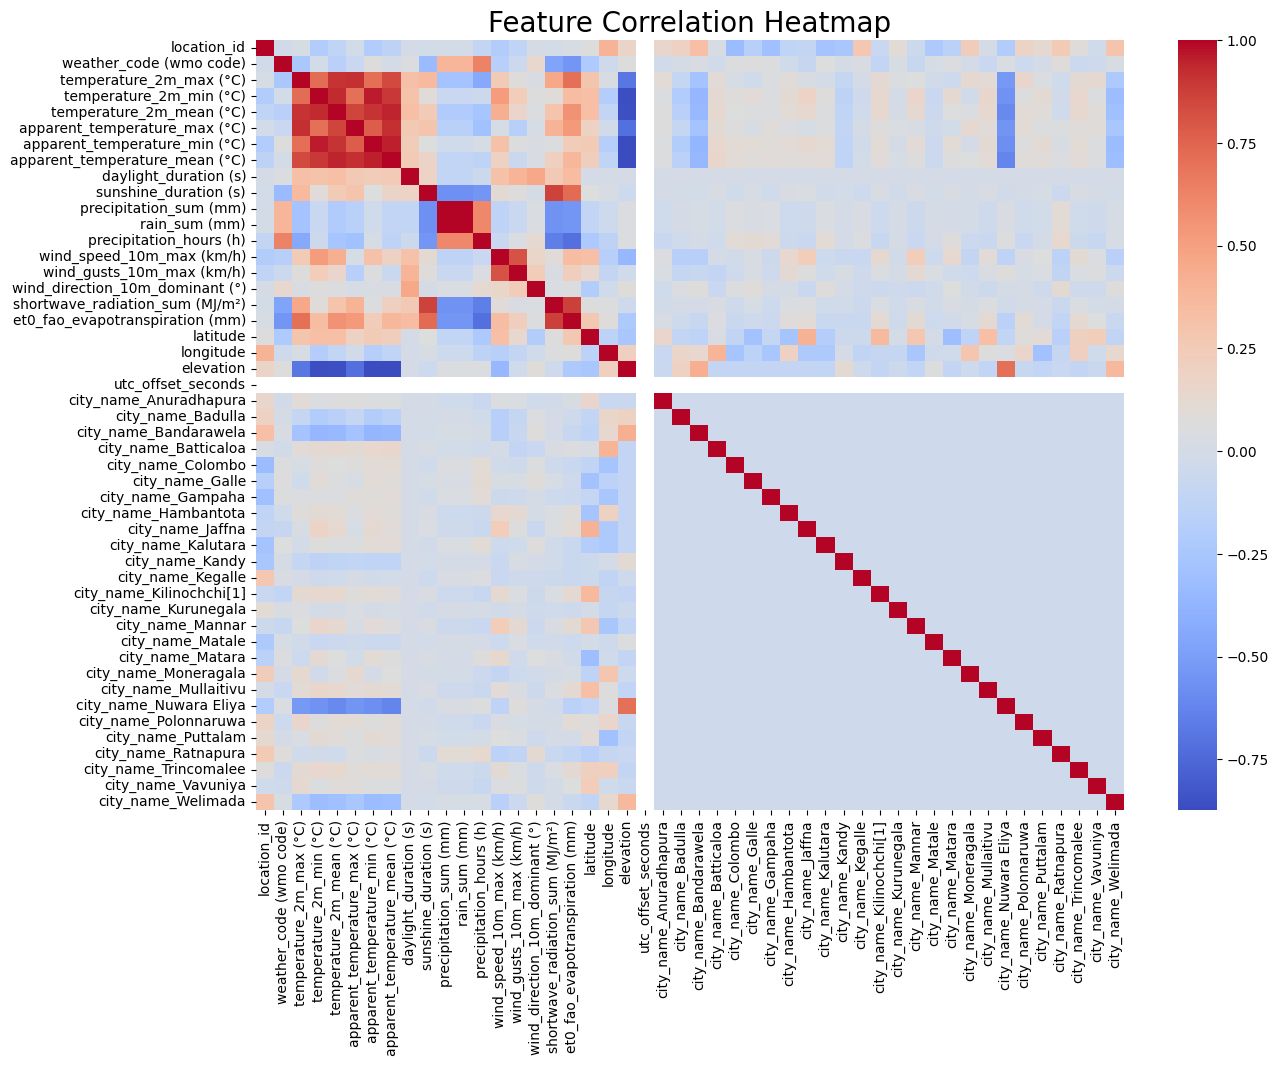

In [68]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(14,10))  # Make the figure big enough
corr = merged_data.corr()             # Calculate the correlation matrix
sns.heatmap(corr, annot=False, cmap='coolwarm')  # Create heatmap, no numbers inside
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()



##### Distribution Plot

* Visualize the distribution of the target variable (temperature_2m_mean)
* This helps to understand the spread of the data, check for outliers, and see if the distribution is skewed.


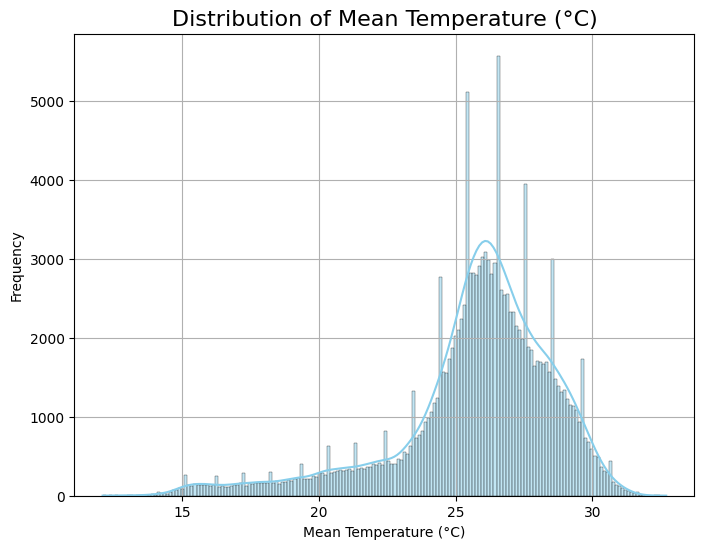

In [69]:
plt.figure(figsize=(8,6))  # Set the figure size
sns.histplot(merged_data['temperature_2m_mean (°C)'], kde=True, color='skyblue')  # Histogram with a Kernel Density Estimate (KDE)
plt.title('Distribution of Mean Temperature (°C)', fontsize=16)  # Set the plot title
plt.xlabel('Mean Temperature (°C)')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Add gridlines for better readability
plt.show()  # Display the plot


Scatter Plot

* Visualize the relationship between top features and the target (temperature_2m_mean).
* Scatterplots help us visually examine how a feature influences the target variable.
* *This* is useful for detecting patterns (e.g., linear, non-linear) and deciding whether specific features are good predictors.


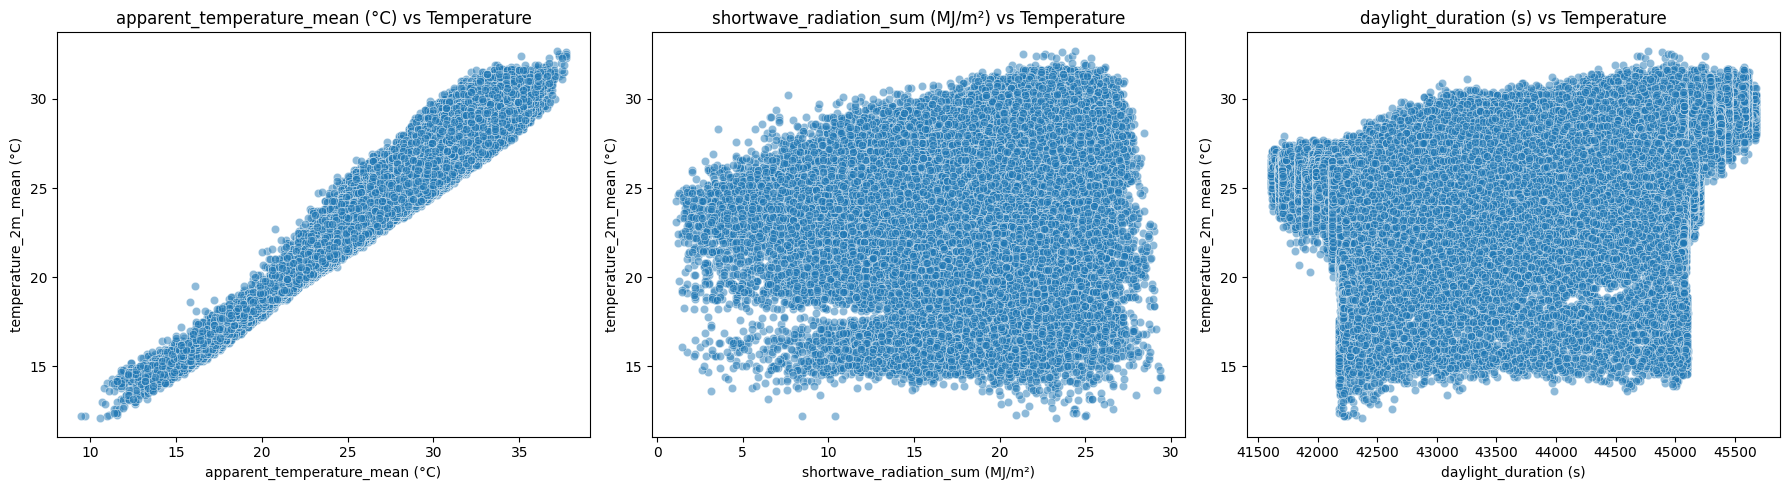

In [70]:

top_features = ['apparent_temperature_mean (°C)', 'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)']

# Loop through top features to create a subplot for each feature against target temperature
plt.figure(figsize=(18,5))  # Set overall figure size for all plots

for idx, feature in enumerate(top_features):
    plt.subplot(1, 3, idx+1)  # Create subplots in a 1x3 grid (3 features)
    sns.scatterplot(data=merged_data, x=feature, y='temperature_2m_mean (°C)', alpha=0.5)  # Scatterplot
    plt.title(f'{feature} vs Temperature')  # Add a title for each subplot

plt.tight_layout()  # Ensure no overlap between subplots
plt.show()  # Display the plots


### Prepare Data


#### Select Features and Target Variable

In [71]:
# Define input features and target
features = [
    'weather_code (wmo code)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'apparent_temperature_mean (°C)',
    'daylight_duration (s)',
    'sunshine_duration (s)',
    'precipitation_sum (mm)',
    'rain_sum (mm)',
    'precipitation_hours (h)',
    'wind_speed_10m_max (km/h)',
    'wind_gusts_10m_max (km/h)',
    'wind_direction_10m_dominant (°)',
    'shortwave_radiation_sum (MJ/m²)',
    'et0_fao_evapotranspiration (mm)',
    'latitude',
    'longitude',
    'elevation'
]

target = 'temperature_2m_mean (°C)'

X = merged_data[features]  # Features
y = merged_data['temperature_2m_mean (°C)']  # Target variable


#### Scale Features

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(merged_data[features])

# Convert to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features)

# Keep the target unscaled
target_df = merged_data[[target]]

# Combine scaled features with original target
scaled_data = pd.concat([scaled_features_df, target_df.reset_index(drop=True)], axis=1)

# Check the scaled data
scaled_data.head()


,weather_code (wmo code),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),latitude,longitude,elevation,temperature_2m_mean (°C)
0,0.015385,0.669516,0.684524,0.691489,0.149922,0.921253,0.000000,0.000000,0.000000,0.169521,0.157756,0.052778,0.700141,0.524164,0.264151,0.033075,0.0,26.0
1,0.784615,0.652422,0.717262,0.716312,0.151277,0.886806,0.000311,0.000311,0.041667,0.183219,0.154251,0.066667,0.586634,0.437423,0.264151,0.033075,0.0,26.3
2,0.784615,0.669516,0.720238,0.723404,0.152745,0.785588,0.001865,0.001865,0.125000,0.171233,0.157756,0.047222,0.588402,0.406444,0.264151,0.033075,0.0,26.0
3,0.030769,0.589744,0.717262,0.670213,0.154327,0.906654,0.000000,0.000000,0.000000,0.251712,0.220859,0.991667,0.543847,0.417596,0.264151,0.033075,0.0,25.7
4,0.015385,0.541311,0.622024,0.592199,0.156019,0.926180,0.000000,0.000000,0.000000,0.280822,0.242770,0.980556,0.795262,0.572491,0.264151,0.033075,0.0,24.6


#### Split the Data

In [73]:
from sklearn.model_selection import train_test_split

# Separate X and y
X = scaled_data[features]
y = scaled_data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build and Train the Model

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
# Initialize the Random Forest Classifier
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,       # for reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Plot feature importance

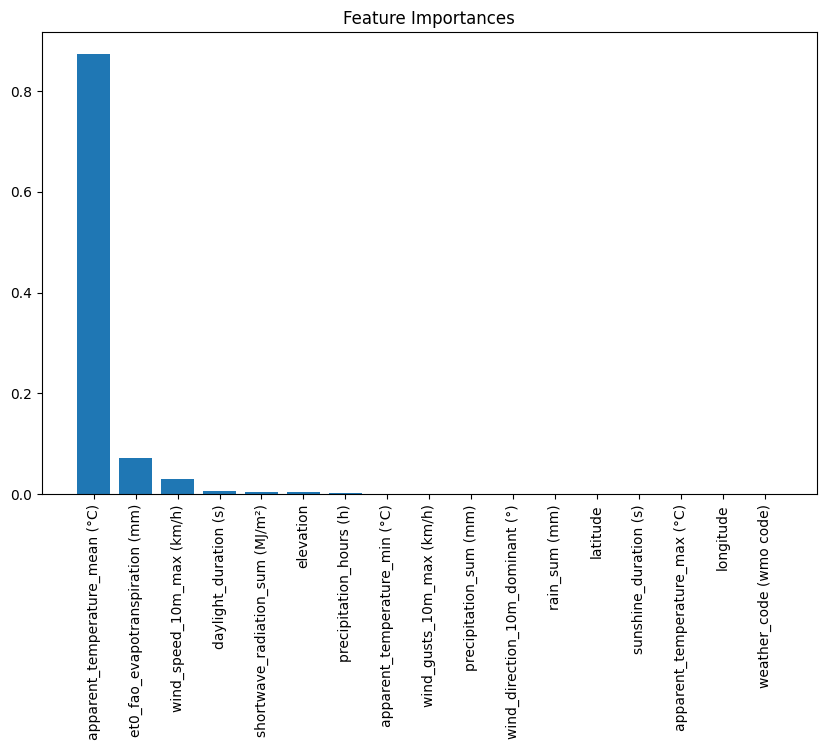

In [76]:
importances = rf_model.feature_importances_  # get feature importances
indices = np.argsort(importances)[::-1]  # sort indices by importance descending

plt.figure(figsize=(10,6))  # set figure size
plt.title("Feature Importances")  # set plot title
plt.bar(range(X.shape[1]), importances[indices], align="center")  # plot bar chart
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # set feature names on x-axis
plt.show()  # show plot


### Make Predictions
#### Predict Using the Model

In [77]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

### Evaluate the Model


##### Evaluation Metrics

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
# Mean Absolute Error (MAE): average of absolute differences between actual and predicted values
print("MAE:", mean_absolute_error(y_test, y_pred))

# Mean Squared Error (MSE): average of squared differences between actual and predicted values
print("MSE:", mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (RMSE): square root of MSE, gives error in same units as target variable
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# R² Score (Coefficient of Determination): measures how well the model explains the variability in the target
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.15092323090430215
MSE: 0.04186366844600529
RMSE: 0.2046061300303715
R2 Score: 0.9952176950535077


#### Visualize Predictions

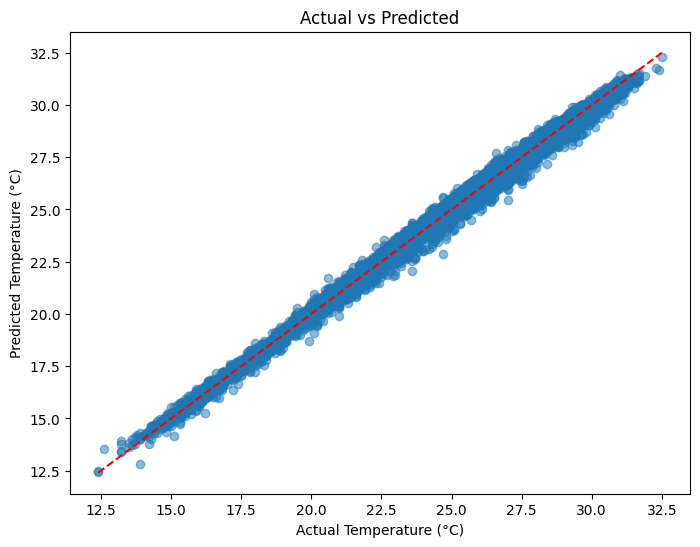

In [82]:
plt.figure(figsize=(8,6))  # set figure size
plt.scatter(y_test, y_pred, alpha=0.5)  # plot actual vs predicted values
plt.xlabel('Actual Temperature (°C)')  # x-axis label
plt.ylabel('Predicted Temperature (°C)')  # y-axis label
plt.title('Actual vs Predicted')  # title of the plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()  # show plot


 ##### Residual Plot

A residual plot shows the difference between the actual values and the predicted values made by the regression model

*   X-axis → Predicted values
*   Y-axis → Residuals (errors)



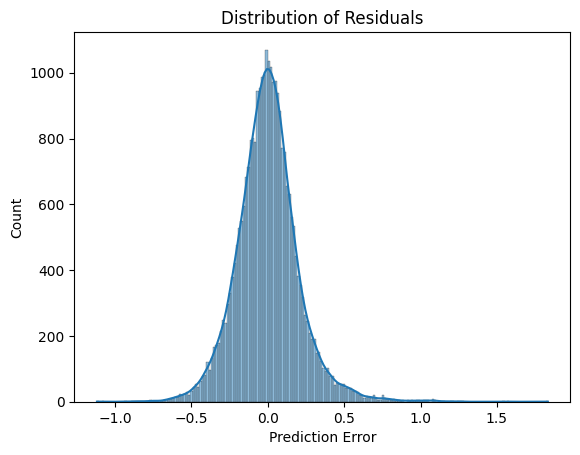

In [81]:
residuals = y_test - y_pred  # calculate residuals
sns.histplot(residuals, kde=True)  # plot histogram with KDE curve
plt.title('Distribution of Residuals')  # title of the plot
plt.xlabel('Prediction Error')  # x-axis label
plt.show()  # show plot
